## **CIFAR10 image classification**

### **1. Load the dataset/Preprocess the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

def data_preprocessing(x, y):
  x = np.array(x/255.0, dtype=np.float32)
  y = np.array(y, dtype=np.float32)
  return x, y

def data_one_hot_encoding(x, y):
  x, y = data_preprocessing(x, y)
  y_ohe = to_categorical(y)
  return x, y_ohe

def get_train_valid_test_data(train_x, train_y, test_x, test_y, valid_size=0.15, random_state=42):
  train_x, train_y_ohe = data_one_hot_encoding(train_x, train_y)
  test_x, test_y_ohe = data_one_hot_encoding(test_x, test_y)
  train_x, valid_x, train_y_ohe, valid_y_ohe = train_test_split(train_x, train_y_ohe, test_size=valid_size, random_state=random_state)
  return (train_x, train_y_ohe), (valid_x, valid_y_ohe), (test_x, test_y_ohe)

In [ ]:
from tensorflow.keras.datasets import cifar10

set_random_seed(42)

(train_x, train_y), (test_x, test_y) = cifar10.load_data()
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### **2. Explore the data**

In [ ]:
train_x[0, :, :, :]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
train_y[0]

array([6], dtype=uint8)

In [ ]:
class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

def show_images(x, y, ncols=5):
  fig, axs = plt.subplots(figsize=(18, 4), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].axis('off')
    axs[i].imshow(x[i])
    y_label = y[i].squeeze()
    axs[i].set_title(f'{class_names[int(y_label)]}', fontsize=12)

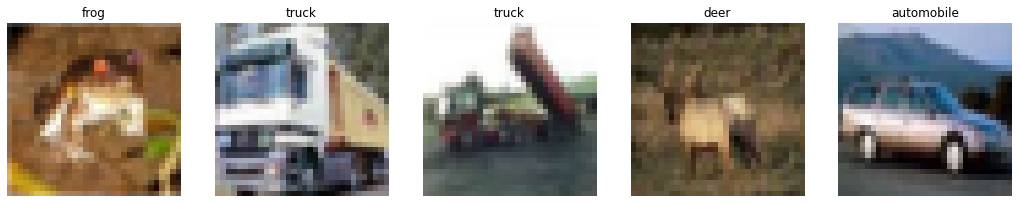

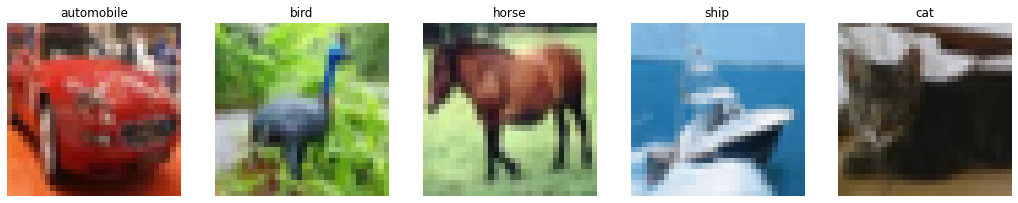

In [ ]:
show_images(train_x[:5], train_y[:5], ncols=5)
show_images(train_x[5:10], train_y[5:10], ncols=5)

In [ ]:
(train_x, train_y_ohe), (valid_x, valid_y_ohe), (test_x, test_y_ohe) = \
get_train_valid_test_data(train_x, train_y, test_x, test_y, valid_size=0.15, random_state=42)
print(train_x.shape, train_y_ohe.shape, valid_x.shape, valid_y_ohe.shape, test_x.shape, test_y_ohe.shape)

(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


In [ ]:
train_x[0, :, :, :]

array([[[0.15294118, 0.41960785, 0.6666667 ],
        [0.16470589, 0.4392157 , 0.6627451 ],
        [0.18431373, 0.44313726, 0.6666667 ],
        ...,
        [0.6       , 0.68235296, 0.8156863 ],
        [0.6156863 , 0.7019608 , 0.8156863 ],
        [0.6431373 , 0.7254902 , 0.827451  ]],

       [[0.15686275, 0.42745098, 0.6784314 ],
        [0.17254902, 0.44705883, 0.6745098 ],
        [0.19215687, 0.45882353, 0.68235296],
        ...,
        [0.6509804 , 0.7176471 , 0.83137256],
        [0.6509804 , 0.7254902 , 0.81960785],
        [0.6627451 , 0.74509805, 0.8352941 ]],

       [[0.16470589, 0.42745098, 0.6784314 ],
        [0.18039216, 0.44705883, 0.68235296],
        [0.2       , 0.4627451 , 0.6901961 ],
        ...,
        [0.6392157 , 0.70980394, 0.8156863 ],
        [0.6313726 , 0.70980394, 0.8039216 ],
        [0.64705884, 0.73333335, 0.8235294 ]],

       ...,

       [[0.4862745 , 0.63529414, 0.7764706 ],
        [0.5058824 , 0.65882355, 0.8       ],
        [0.47058824, 0

In [ ]:
train_y_ohe[0, :]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### **3. Build the model**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization

x_size = 32

input_tensor = Input(shape=(x_size, x_size, 3))
x = Conv2D(filters=32, kernel_size=3, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(10, activation='softmax')(x)
    
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                             

### **4. Compile/Train the model**

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y_ohe, batch_size=64, epochs=30, validation_data=(valid_x, valid_y_ohe))

Epoch 1/30
665/665 [==============================] - 17s 9ms/step - loss: 1.5606 - accuracy: 0.4344 - val_loss: 1.3551 - val_accuracy: 0.5043
Epoch 2/30
665/665 [==============================] - 6s 9ms/step - loss: 1.0836 - accuracy: 0.6136 - val_loss: 0.9177 - val_accuracy: 0.6725
Epoch 3/30
665/665 [==============================] - 6s 8ms/step - loss: 0.8924 - accuracy: 0.6881 - val_loss: 0.8758 - val_accuracy: 0.6964
Epoch 4/30
665/665 [==============================] - 6s 8ms/step - loss: 0.7774 - accuracy: 0.7303 - val_loss: 0.8203 - val_accuracy: 0.7195
Epoch 5/30
665/665 [==============================] - 6s 9ms/step - loss: 0.7011 - accuracy: 0.7596 - val_loss: 0.7916 - val_accuracy: 0.7292
Epoch 6/30
665/665 [==============================] - 7s 11ms/step - loss: 0.6391 - accuracy: 0.7794 - val_loss: 0.7592 - val_accuracy: 0.7391
Epoch 7/30
665/665 [==============================] - 6s 9ms/step - loss: 0.5783 - accuracy: 0.8004 - val_loss: 0.8084 - val_accuracy: 0.7327
Epoc

### **5. Evaluate the model**

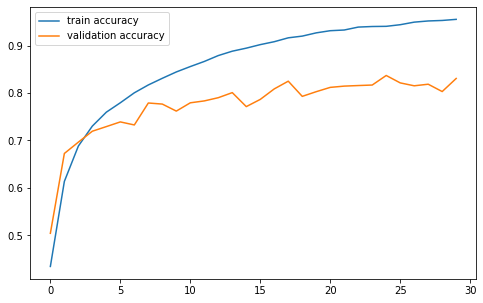

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y_ohe)
print(f'Test accuracy : {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.6736 - accuracy: 0.8287
Test accuracy : 0.8287000060081482


### **6. Make predictions**

In [ ]:
pred = model.predict(np.expand_dims(test_x[0], axis=0))
print(f'Pediction shape : {pred.shape}')
print(f'Pediction : {pred}')

Pediction shape : (1, 10)
Pediction : [[4.2520005e-06 4.3347740e-07 2.6557169e-05 9.8685604e-01 5.7568477e-06
  1.1964851e-02 1.1394211e-03 1.3718566e-06 4.3269637e-07 8.9247209e-07]]


In [ ]:
preds = model.predict(test_x)
print(f'Pediction shape : {preds.shape}')
print(f'Pediction : {preds}')

Pediction shape : (10000, 10)
Pediction : [[4.25194412e-06 4.33467477e-07 2.65566614e-05 ... 1.37183054e-06
  4.32686079e-07 8.92449179e-07]
 [3.71831050e-07 1.07125607e-06 1.19025857e-14 ... 1.45935770e-16
  9.99998569e-01 3.84261983e-10]
 [7.54283974e-06 5.22789080e-03 1.10123004e-07 ... 6.00166672e-08
  9.94574606e-01 2.50494486e-06]
 ...
 [6.45321663e-08 2.38720972e-08 2.34609615e-05 ... 1.28406653e-04
  3.07665005e-07 1.08524645e-07]
 [1.55932378e-06 9.99995589e-01 1.15579990e-10 ... 6.05628481e-09
  1.67296594e-06 4.55226797e-07]
 [1.03831166e-09 8.54965057e-11 2.00281214e-08 ... 9.99777853e-01
  1.59287806e-12 6.14433088e-11]]


In [ ]:
def show_images(x, y, preds, ncols=5):
  fig, axs = plt.subplots(figsize=(18, 4), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].axis('off')
    axs[i].imshow(x[i])
    y_label = class_names[int(y[i].squeeze())]
    preds_label = class_names[(np.argmax(preds, axis=1))[i]]
    if y_label == preds_label:
      color = 'blue'
    else:
      color = 'red'
    preds_num = np.max(preds[i])*100
    axs[i].set_title(f' {y_label} / {preds_label}({preds_num:2.0f}%)', fontsize=12, color=color)

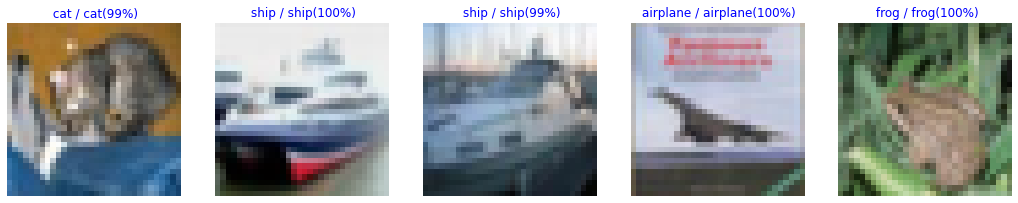

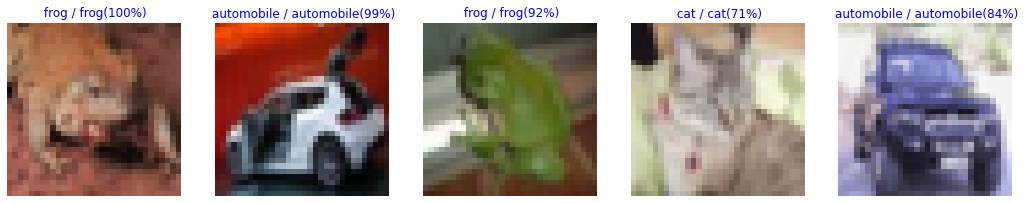

In [ ]:
show_images(test_x[:5], test_y[:5], preds[:5], ncols=5)
show_images(test_x[5:10], test_y[5:10], preds[5:10], ncols=5)